<a href="https://colab.research.google.com/github/liamglennon/FYP/blob/main/FYPCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Radiation Patterns

Saving Liam1_t20dbm_rightone.csv to Liam1_t20dbm_rightone (1).csv
Saving Liam2_t20dbm_rightone.csv to Liam2_t20dbm_rightone (1).csv
Saving Liam2_t20dbm_rightone2.csv to Liam2_t20dbm_rightone2 (1).csv


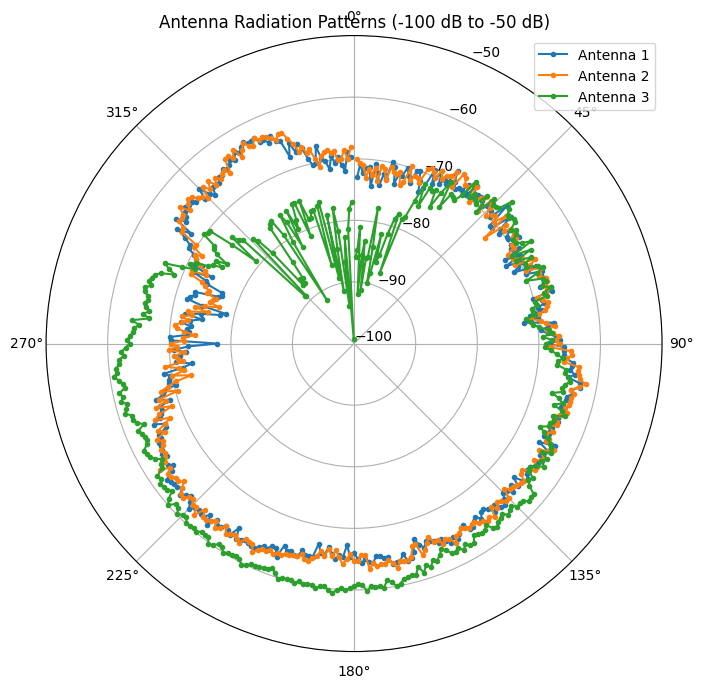

Estimated received power at 10 meters: -27.21 dBm


In [2]:
# --- Set up ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Data (After Uploading to Colab) ---
from google.colab import files
uploaded = files.upload()

# Replace with actual filenames after uploading
df1 = pd.read_csv("Liam2_t20dbm_rightone.csv", names=["Angle", "Signal Strength 1"], skiprows=1)
df2 = pd.read_csv("Liam2_t20dbm_rightone2.csv", names=["Angle", "Signal Strength 2"], skiprows=1)
df3 = pd.read_csv("Liam1_t20dbm_rightone.csv", names=["Angle", "Signal Strength 3"], skiprows=1)


# --- Merge on Angle ---
df = pd.merge(df1, df2, on="Angle")
df = pd.merge(df, df3, on="Angle")

# --- Convert angle to radians for polar plotting ---
angles = np.radians(df["Angle"])
s1 = df["Signal Strength 1"]
s2 = df["Signal Strength 2"]
s3 = df["Signal Strength 3"]

# --- Polar Plot (No Normalization) ---
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.plot(angles, s1, label="Antenna 1", linestyle='-', marker='.')
ax.plot(angles, s2, label="Antenna 2", linestyle='-', marker='.')
ax.plot(angles, s3, label="Antenna 3", linestyle='-', marker='.')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Antenna Radiation Patterns (-100 dB to -50 dB)")
ax.set_rlim(-100, -50)
ax.set_yticks(np.arange(-100, -49, 10))
ax.legend(loc="upper right")
plt.show()

# --- Friis Transmission Equation ---
def friis_pr(pt_dbm, gt_dbi, gr_dbi, freq_hz, distance_m):
    """
    pt_dbm: Transmit power in dBm
    gt_dbi: Transmitter gain in dBi
    gr_dbi: Receiver gain in dBi
    freq_hz: Frequency in Hz
    distance_m: Distance in meters
    Returns received power in dBm
    """
    c = 3e8  # Speed of light in m/s
    wavelength = c / freq_hz
    path_loss_db = 20 * np.log10(4 * np.pi * distance_m / wavelength)
    pr_dbm = pt_dbm + gt_dbi + gr_dbi - path_loss_db
    return pr_dbm

# --- Example Usage ---
pt = 20         # 20 dBm (100 mW)
gt = 2          # 2 dBi gain
gr = 2          # 2 dBi gain
freq = 868e6    # 868 MHz
d = 10          # 10 meters

pr = friis_pr(pt, gt, gr, freq, d)
print(f"Estimated received power at {d} meters: {pr:.2f} dBm")


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# --- Upload CSVs ---
uploaded = files.upload()

# --- Load and Merge Data ---
df1 = pd.read_csv("Liam2_t20dbm_rightone.csv", names=["Angle", "Signal Strength 1"], skiprows=1)
df2 = pd.read_csv("Liam2_t20dbm_rightone2.csv", names=["Angle", "Signal Strength 2"], skiprows=1)
df3 = pd.read_csv("Liam1_t20dbm_rightone.csv", names=["Angle", "Signal Strength 3"], skiprows=1)

df = pd.merge(df1, df2, on="Angle")
df = pd.merge(df, df3, on="Angle")



# --- Corrected Parameters ---
pt = 30 - 7.2     # Effective transmit power after cable loss (dBm)
gt = 2            # Transmit antenna gain (dBi)
gr = 11.6         # Receiver antenna gain (dBi)
freq = 6e9        # Frequency (Hz)
d = 8             # Distance (m)

# --- Friis Transmission Function ---
def friis_pr(pt_dbm, gt_dbi, gr_dbi, freq_hz, distance_m):
    c = 3e8
    wavelength = c / freq_hz
    path_loss_db = 20 * np.log10(4 * np.pi * distance_m / wavelength)
    pr_dbm = pt_dbm + gt_dbi + gr_dbi - path_loss_db
    return pr_dbm

# --- Calculate Expected Power ---
expected_power = friis_pr(pt, gt, gr, freq, d)
print(f"Expected received power (Friis): {expected_power:.2f} dBm\n")

# --- Compare Each Antenna ---
for i in range(1, 4):
    measured_avg = df[f"Signal Strength {i}"].mean()
    delta = measured_avg - expected_power
    print(f"Antenna {i}:")
    print(f"  Measured Average Power: {measured_avg:.2f} dBm")
    print(f"  Delta vs. Friis:        {delta:.2f} dB\n")



Saving Liam1_t20dbm_rightone.csv to Liam1_t20dbm_rightone (3).csv
Saving Liam2_t20dbm_rightone.csv to Liam2_t20dbm_rightone (3).csv
Saving Liam2_t20dbm_rightone2.csv to Liam2_t20dbm_rightone2 (3).csv
Expected received power (Friis): -29.67 dBm

Antenna 1:
  Measured Average Power: -67.23 dBm
  Delta vs. Friis:        -37.56 dB

Antenna 2:
  Measured Average Power: -66.95 dBm
  Delta vs. Friis:        -37.28 dB

Antenna 3:
  Measured Average Power: -68.21 dBm
  Delta vs. Friis:        -38.54 dB

